In [1]:
import sys

In [2]:
sys.path.append('/usr/lib/paraview/site-packages/paraview')

In [3]:
from paraview.simple import *

ImportError: No module named paraview.simple

In [7]:
%%file paraview_view.py
#### import the simple module from the paraview
from paraview.simple import *
#### disable automatic camera reset on 'Show'
paraview.simple._DisableFirstRenderCameraReset()

# create a new 'Legacy VTK Reader'
meshvtk = LegacyVTKReader(FileNames=['/home/bergmann/peterb/tech_topics/460_fem_pipe/fem-pipe/mesh.vtk'])

# get active view
renderView1 = GetActiveViewOrCreate('RenderView')
# uncomment following to set a specific view size
# renderView1.ViewSize = [660, 497]

# get color transfer function/color map for 'valuesC'
valuesCLUT = GetColorTransferFunction('valuesC')

# show data in view
meshvtkDisplay = Show(meshvtk, renderView1)
# trace defaults for the display properties.
meshvtkDisplay.ColorArrayName = ['POINTS', 'valuesC']
meshvtkDisplay.LookupTable = valuesCLUT
meshvtkDisplay.GlyphType = 'Arrow'
meshvtkDisplay.ScalarOpacityUnitDistance = 36.430215288341394

# reset view to fit data
renderView1.ResetCamera()

# show color bar/color legend
meshvtkDisplay.SetScalarBarVisibility(renderView1, True)

# get opacity transfer function/opacity map for 'valuesC'
valuesCPWF = GetOpacityTransferFunction('valuesC')

#### saving camera placements for all active views

# current camera placement for renderView1
renderView1.CameraPosition = [428.1137148925292, 338.7480691234168, 1888.8196029267604]
renderView1.CameraFocalPoint = [0.0, 0.0, 150.0]
renderView1.CameraViewUp = [-0.015792468841630044, 0.9821474237256779, -0.187448755655779]
renderView1.CameraParallelScale = 471.6990566028302

#### uncomment the following to render all views
# RenderAllViews()
# alternatively, if you want to write images, you can use SaveScreenshot(...).

# save screenshot
SaveScreenshot('/home/bergmann/peterb/tech_topics/460_fem_pipe/fem-pipe/mayavi/out.png', magnification=1, quality=100, view=renderView1)

Overwriting paraview_view.py


In [8]:
!paraview --script=paraview_view.py

paraview version 5.0.1


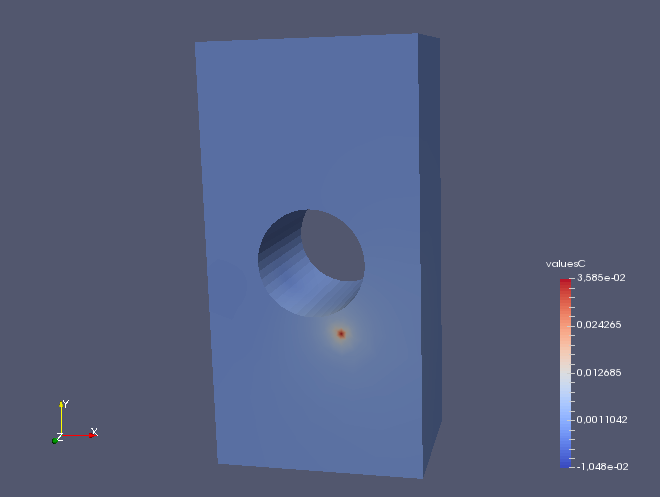

In [9]:
from IPython.display import Image
Image(filename='out.png') 